In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data Path

In [2]:
region_name = "denver/"
area_name = 'denver-aurora-lakewood, co'

# base data set
mls_path = region_name + "data/mls/listing_dates_with_ct.csv"

# google trends
google_trend_path = region_name + "data/google_trends/google_trends_scaled.csv"

# housing market metrics
housing_metric_path = region_name + "data/housing_metrics/RDC_Inventory_Core_Metrics_Metro_History.csv"
housing_hotness_path = region_name + "data/housing_metrics/RDC_Inventory_Hotness_Metrics_Metro_History.csv"

# economic indicators
m15_path = region_name + "data/econ_indicators/15yearmortgage.csv"
m30_path = region_name + "data/econ_indicators/30yearmortgage.csv"
m51_path = region_name + "data/econ_indicators/51yearmortgage.csv"
unemployment_path = region_name + "data/econ_indicators/unemployment.csv"
avg_hour_salary_path = region_name + "data/econ_indicators/avg_hourly_earning.csv"
avg_week_salary_path = region_name + "data/econ_indicators/avg_weekly_earning.csv"
building_path = region_name + "data/econ_indicators/building_permit.csv"
building_1unit_path = region_name + "data/econ_indicators/building_permit_1unit.csv"


# Data Preprocessing

## 1. MLS data

In [3]:
df = pd.read_csv(mls_path)
df.head()

,property_id,zipcode,latitude,longitude,list_date,sale_date,withdrawn_date,expired_date,cancelled_date,current_status,sale_price,geometry,index_right,ct_key
0,666680976,80113,39.65232,-104.97613,2016-03-01,NaN,NaN,2016-03-01,NaN,Expired,NaN,POINT (-104.97613 39.65232),10693.0,8.005006e+09
1,138826052,80123,39.62523,-105.08648,2016-03-01,NaN,NaN,2016-03-01,NaN,Expired,NaN,POINT (-105.08648 39.62523),9869.0,8.059012e+09
2,666683709,80204,39.74122,-105.05241,2016-03-01,NaN,NaN,2016-03-01,NaN,Expired,NaN,POINT (-105.05241 39.74122),10476.0,8.031001e+09
3,137981678,80241,39.91465,-104.93076,2016-03-01,2016-04-21,NaN,NaN,NaN,Sale,320000.0,POINT (-104.93076 39.91465),9719.0,8.001009e+09
4,410875086,80202,39.74783,-104.98640,2016-03-01,2016-05-02,NaN,NaN,NaN,Sale,475000.0,POINT (-104.9864 39.74783),10465.0,8.031002e+09


In [4]:
df.loc[:, 'list_date_m'] = pd.to_datetime(df['list_date']).dt.to_period('M')
df.loc[:, 'sale_date_m'] = pd.to_datetime(df['sale_date']).dt.to_period('M')

In [5]:
num_listings_ct = df.dropna(subset=['list_date_m']).groupby(['list_date_m']).count()[['property_id']].reset_index()
num_listings_ct = num_listings_ct.rename(columns={'property_id':'ct_listings', 'list_date_m':'month'})\

num_sales_ct = df.dropna(subset=['sale_date_m']).groupby(['sale_date_m']).count()[['property_id']].reset_index()
num_sales_ct = num_sales_ct.rename(columns={'property_id':'ct_sales', 'sale_date_m':'month'})

num_sales_listings = pd.merge(num_listings_ct, num_sales_ct, left_on=['month'], right_on=['month'], how='left')
num_sl = num_sales_listings.fillna(0.)
num_sl = num_sl.sort_values('month')

#fix outlier value
num_sl.iloc[39,1] = (9233 + 13593) / 2
num_sl = num_sl[:-1]

#num_sl['month'] = pd.to_datetime(num_sl['month'].astype(str))
num_sl

,month,ct_listings,ct_sales
0,2016-03,12897,5242
1,2016-04,10652,5554
2,2016-05,9340,6313
3,2016-06,9525,6909
4,2016-07,8170,6408
5,2016-08,7697,6614
6,2016-09,6950,6109
7,2016-10,5371,5599
8,2016-11,3966,5302
9,2016-12,2768,5156


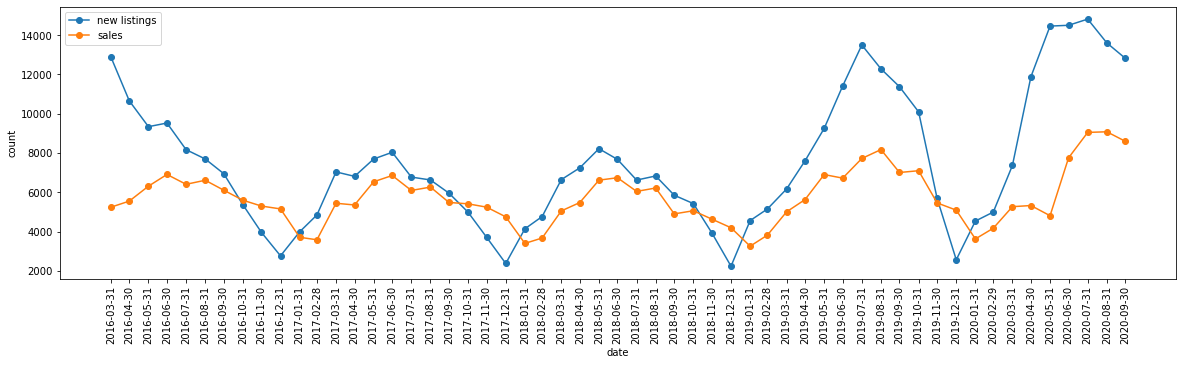

In [6]:
plt.figure(figsize=(20,5))
plt.plot_date(num_sl['month'], num_sl['ct_listings'], ls='-', label='new listings')
plt.plot_date(num_sl['month'], num_sl['ct_sales'], ls='-', label='sales')
plt.xticks(num_sl['month'], rotation=90)
plt.ylabel('count')
plt.xlabel('date')
plt.legend()
plt.show()

## 2. Google Trends Data

In [7]:
# call google trends package by Yixuan

In [8]:
df_trend = pd.read_csv(google_trend_path, index_col=0)
print(df_trend.shape)

(55, 29)


In [9]:
df_trend['month'] = pd.to_datetime(df_trend['month'])
df_trend['month'] = df_trend['month'].dt.to_period('M')
df_trend[:5]

,month,homes for sale,townhomes for sale,Homes in,townhouses in,Homes near me,zillow homes for sale,selling a house,house appraisal,home values,...,real estate agents,best realtors,for sale by owner,redfin,trulia,realtor.com,Homes in Denver,selling a house in Denver,house appraisal in Denver,for sale by owner in Denver
0,2016-03,71.279751,45.731855,100.000000,100.000000,1.152516,9.873854,98.216138,100.000000,85.200090,...,83.028011,79.206349,71.950667,13.663482,97.084922,32.608612,83.900580,78.686142,28.608541,90.457331
1,2016-04,65.377771,73.121023,99.892689,28.638918,2.927375,6.588620,91.466562,77.175591,68.795447,...,100.000000,41.129426,56.327748,18.038512,93.422996,44.912573,90.410047,100.000000,66.930681,70.116575
2,2016-05,67.316675,36.406112,86.215481,64.991447,0.000000,3.374172,61.840540,75.270094,95.276064,...,35.888193,32.573871,63.168269,18.718533,87.575279,44.453392,68.627062,67.838093,49.408187,88.828277
3,2016-06,59.772373,92.568674,81.728430,55.884988,5.284968,13.172702,76.101313,67.885551,100.000000,...,38.098334,42.985348,57.792813,12.829219,95.711054,38.489781,55.316301,48.005232,14.402484,72.612465
4,2016-07,61.815081,95.738568,84.635856,40.320925,4.728896,18.482621,61.552086,88.562270,82.668873,...,32.134499,16.735043,61.127834,12.576029,79.179192,48.134514,58.333747,98.510283,52.459764,82.670752


## 3. Housing Metrics

In [10]:
dfhm = pd.read_csv(housing_metric_path)
print(dfhm.shape)

(47684, 40)


In [11]:
dfhm.columns

Index(['month_date_yyyymm', 'cbsa_code', 'cbsa_title', 'HouseholdRank',
       'median_listing_price', 'median_listing_price_mm',
       'median_listing_price_yy', 'active_listing_count',
       'active_listing_count_mm', 'active_listing_count_yy',
       'median_days_on_market', 'median_days_on_market_mm',
       'median_days_on_market_yy', 'new_listing_count', 'new_listing_count_mm',
       'new_listing_count_yy', 'price_increased_count',
       'price_increased_count_mm', 'price_increased_count_yy',
       'price_reduced_count', 'price_reduced_count_mm',
       'price_reduced_count_yy', 'pending_listing_count',
       'pending_listing_count_mm', 'pending_listing_count_yy',
       'median_listing_price_per_square_foot',
       'median_listing_price_per_square_foot_mm',
       'median_listing_price_per_square_foot_yy', 'median_square_feet',
       'median_square_feet_mm', 'median_square_feet_yy',
       'average_listing_price', 'average_listing_price_mm',
       'average_listing_price

In [12]:
dfhm = dfhm[dfhm['cbsa_title'] == area_name]
dfhm['month_date_yyyymm'] = pd.to_datetime(dfhm['month_date_yyyymm'], format='%Y%m').dt.to_period('M')
dfhm = dfhm.sort_values('month_date_yyyymm')
dfhm = dfhm.reset_index(drop=True)

In [13]:
housing_metrics = ['month_date_yyyymm', 
                   'median_listing_price', 'active_listing_count', 'median_days_on_market', 
                   'price_increased_count', 'price_reduced_count', 'pending_listing_count', 
                   'median_listing_price_per_square_foot', 'median_square_feet', 'average_listing_price',
                   'pending_ratio']

dfhm = dfhm[housing_metrics]
dfhm = dfhm.rename(columns={'month_date_yyyymm':'month'})


## 4. housing hotness

In [14]:
dfhot = pd.read_csv(housing_hotness_path)
print(dfhot.shape)

(15601, 24)


In [15]:
dfhot = dfhot[dfhot['cbsa_title'] == area_name]
dfhot['month_date_yyyymm'] = pd.to_datetime(dfhot['month_date_yyyymm'], format='%Y%m').dt.to_period('M')
dfhot = dfhot.sort_values('month_date_yyyymm')
dfhot = dfhot.reset_index(drop=True)

In [16]:
hotness_metrics = ['month_date_yyyymm', 'supply_score', 'demand_score', 'ldpviews_per_property_vs_us']
dfhot = dfhot[hotness_metrics]
dfhot = dfhot.rename(columns={'month_date_yyyymm':'month'})
dfhot[:5]

,month,supply_score,demand_score,ldpviews_per_property_vs_us
0,2016-07,98.327759,91.638796,1.7500
1,2016-08,98.662207,91.638796,1.7447
2,2016-09,97.658863,93.311037,1.7955
3,2016-10,97.993311,94.314381,1.8372
4,2016-11,96.989967,95.652174,1.9524


## 5. econ indicators

In [17]:
# mortgage rates
m15 = pd.read_csv(m15_path)
m30 = pd.read_csv(m30_path)
m51 = pd.read_csv(m51_path)

# employment
unemployment = pd.read_csv(unemployment_path)
unemployment = unemployment.rename(columns={unemployment.columns[1]:'unemployment_rate'})

# income
avg_hour_salary = pd.read_csv(avg_hour_salary_path)
avg_hour_salary = avg_hour_salary.rename(columns={avg_hour_salary.columns[1]:'avg_hour_salary'})

avg_week_salary = pd.read_csv(avg_week_salary_path)
avg_week_salary = avg_week_salary.rename(columns={avg_week_salary.columns[1]:'avg_week_salary'})


# building
building_permit = pd.read_csv(building_path)
building_permit = building_permit.rename(columns={building_permit.columns[1]:'building_permits'})

building_permit_1unit = pd.read_csv(building_1unit_path)
building_permit_1unit = building_permit_1unit.rename(columns={building_permit_1unit.columns[1]:'building_permits_1unit'})

In [18]:
# convert weely mortgage rate to monthly mortgage rate
m = m15.merge(m30).merge(m51)
m['DATE'] = m['DATE'].apply(lambda x: x[:8] + '01')
m = m.groupby('DATE').mean()
m = m.reset_index()
m[:5]

,DATE,MORTGAGE15US,MORTGAGE30US,MORTGAGE5US
0,2016-03-01,2.9660,3.694,2.8960
1,2016-04-01,2.8700,3.605,2.8325
2,2016-05-01,2.8425,3.600,2.8125
3,2016-06-01,2.8420,3.568,2.7760
4,2016-07-01,2.7475,3.440,2.7500


In [19]:
dfmacro = m.merge(unemployment).merge(avg_hour_salary).merge(avg_week_salary).merge(building_permit).merge(building_permit_1unit)
dfmacro['DATE'] = pd.to_datetime(dfmacro['DATE']).dt.to_period('M')
dfmacro = dfmacro.rename(columns={'DATE':'month'})
dfmacro.head()

,month,MORTGAGE15US,MORTGAGE30US,MORTGAGE5US,unemployment_rate,avg_hour_salary,avg_week_salary,building_permits,building_permits_1unit
0,2016-03,2.9660,3.694,2.8960,3.5,29.121116,1005.494397,1358.089271,849.003955
1,2016-04,2.8700,3.605,2.8325,3.2,29.055915,1003.535578,1532.261067,825.727158
2,2016-05,2.8425,3.600,2.8125,3.0,29.317687,1031.814292,2241.199243,780.248762
3,2016-06,2.8420,3.568,2.7760,3.4,29.006169,1001.055925,1258.299279,806.987158
4,2016-07,2.7475,3.440,2.7500,3.1,28.895241,1002.485800,1557.790154,874.314620


## 6. Merge All data Sources Together

### MLS + Google Trends + Econ Indicators

In [20]:
dfres = num_sl.merge(df_trend, how='left').merge(dfhm, how='left').merge(dfhot, how='left').merge(dfmacro, how='left')
dfres[:5]

,month,ct_listings,ct_sales,homes for sale,townhomes for sale,Homes in,townhouses in,Homes near me,zillow homes for sale,selling a house,...,demand_score,ldpviews_per_property_vs_us,MORTGAGE15US,MORTGAGE30US,MORTGAGE5US,unemployment_rate,avg_hour_salary,avg_week_salary,building_permits,building_permits_1unit
0,2016-03,12897,5242,71.279751,45.731855,100.000000,100.000000,1.152516,9.873854,98.216138,...,NaN,NaN,2.9660,3.694,2.8960,3.5,29.121116,1005.494397,1358.089271,849.003955
1,2016-04,10652,5554,65.377771,73.121023,99.892689,28.638918,2.927375,6.588620,91.466562,...,NaN,NaN,2.8700,3.605,2.8325,3.2,29.055915,1003.535578,1532.261067,825.727158
2,2016-05,9340,6313,67.316675,36.406112,86.215481,64.991447,0.000000,3.374172,61.840540,...,NaN,NaN,2.8425,3.600,2.8125,3.0,29.317687,1031.814292,2241.199243,780.248762
3,2016-06,9525,6909,59.772373,92.568674,81.728430,55.884988,5.284968,13.172702,76.101313,...,NaN,NaN,2.8420,3.568,2.7760,3.4,29.006169,1001.055925,1258.299279,806.987158
4,2016-07,8170,6408,61.815081,95.738568,84.635856,40.320925,4.728896,18.482621,61.552086,...,91.638796,1.75,2.7475,3.440,2.7500,3.1,28.895241,1002.485800,1557.790154,874.314620


In [21]:
# dfres.to_csv('denver_data.csv', index=False)

### MLS + Econ Indicators

In [22]:
df_econ_mls = num_sl.merge(dfhm, how='left').merge(dfhot, how='left').merge(dfmacro, how='left')
df_econ_mls[:5]

,month,ct_listings,ct_sales,median_listing_price,active_listing_count,median_days_on_market,price_increased_count,price_reduced_count,pending_listing_count,median_listing_price_per_square_foot,...,demand_score,ldpviews_per_property_vs_us,MORTGAGE15US,MORTGAGE30US,MORTGAGE5US,unemployment_rate,avg_hour_salary,avg_week_salary,building_permits,building_permits_1unit
0,2016-03,12897,5242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2.9660,3.694,2.8960,3.5,29.121116,1005.494397,1358.089271,849.003955
1,2016-04,10652,5554,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2.8700,3.605,2.8325,3.2,29.055915,1003.535578,1532.261067,825.727158
2,2016-05,9340,6313,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2.8425,3.600,2.8125,3.0,29.317687,1031.814292,2241.199243,780.248762
3,2016-06,9525,6909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2.8420,3.568,2.7760,3.4,29.006169,1001.055925,1258.299279,806.987158
4,2016-07,8170,6408,495050.0,7272.0,34.0,304.0,3388.0,418.0,169.494139,...,91.638796,1.75,2.7475,3.440,2.7500,3.1,28.895241,1002.485800,1557.790154,874.314620


In [23]:
# df_econ_mls.to_csv('denver_econ_mls.csv', index=False)

### Econ indicators

In [24]:
df_econ = dfhm.merge(dfhot, how='left').merge(dfmacro, how='left')
df_econ[:5]

,month,median_listing_price,active_listing_count,median_days_on_market,price_increased_count,price_reduced_count,pending_listing_count,median_listing_price_per_square_foot,median_square_feet,average_listing_price,...,demand_score,ldpviews_per_property_vs_us,MORTGAGE15US,MORTGAGE30US,MORTGAGE5US,unemployment_rate,avg_hour_salary,avg_week_salary,building_permits,building_permits_1unit
0,2016-07,495050.0,7272,34.0,304,3388,418,169.494139,3056.0,677178,...,91.638796,1.7500,2.7475,3.440,2.7500,3.1,28.895241,1002.485800,1557.790154,874.314620
1,2016-08,490050.0,7567,35.5,256,3420,452,170.632627,2957.0,662945,...,91.638796,1.7447,2.7450,3.435,2.7450,3.0,28.811627,1000.055202,1494.700070,913.006712
2,2016-09,489500.0,7631,40.5,284,3416,438,171.488185,2918.0,658287,...,93.311037,1.7955,2.7560,3.460,2.8140,2.9,28.719960,995.203511,1930.650955,906.829652
3,2016-10,489050.0,7349,43.0,212,3176,423,171.620047,2910.0,660755,...,94.314381,1.8372,2.7625,3.470,2.8275,2.8,29.187290,1031.379077,2442.475902,922.795686
4,2016-11,497050.0,6365,49.5,264,2324,395,173.038808,2910.0,673558,...,95.652174,1.9524,3.0275,3.770,2.9850,2.6,28.833690,997.094884,2349.575299,924.226980


In [25]:
# df_econ.to_csv('denver_econ.csv', index=False)